<a href="https://colab.research.google.com/github/kasaiannn/HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

# 1)Зависимость задержек по месяцам.

<ipython-input-52-7174d7678d69>:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights= pd.read_csv('flights.csv')


MONTH
1      9.759471
2     11.885284
3      9.660903
4      7.721885
5      9.454144
6     13.986016
7     11.394664
8      9.932045
9      4.823560
10     4.982661
11     6.944197
12    11.783529
Name: DEPARTURE_DELAY, dtype: float64


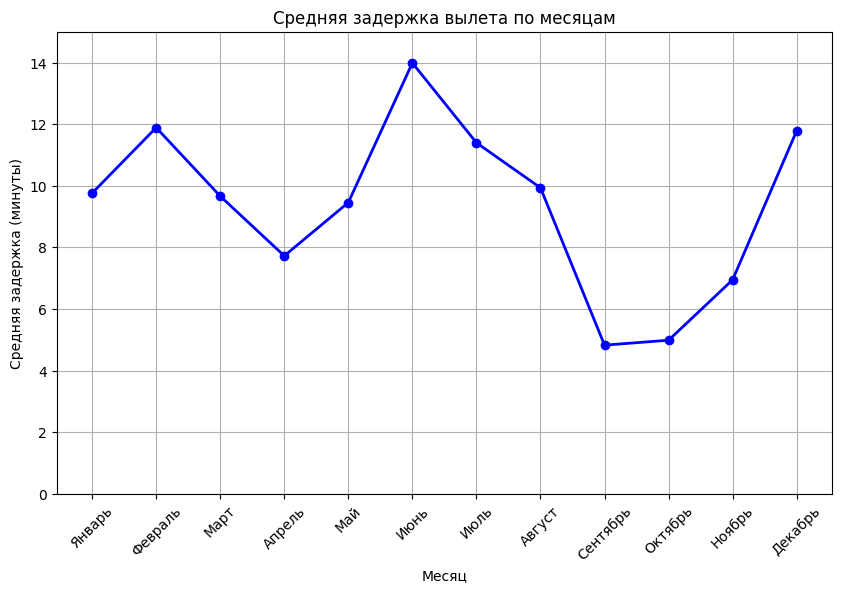

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights= pd.read_csv('flights.csv')




# Группировка по месяцам и расчет средней задержки вылета
delay_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
print(delay_by_month)

# Создаем список с названиями месяцев для подписей на графике
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(delay_by_month.index, delay_by_month.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13), months, rotation=45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

 Вывод графика: самое большое среднее время задержки в июне.

# 2)Задержки по авиакомпаниям.

AIRLINE_y
Spirit Air Lines                15.944766
United Air Lines Inc.           14.435441
Frontier Airlines Inc.          13.350858
JetBlue Airways                 11.514353
Southwest Airlines Co.          10.581986
American Eagle Airlines Inc.    10.125188
Virgin America                   9.022595
American Airlines Inc.           8.900856
Atlantic Southeast Airlines      8.715934
Skywest Airlines Inc.            7.801104
Delta Air Lines Inc.             7.369254
US Airways Inc.                  6.141137
Alaska Airlines Inc.             1.785801
Hawaiian Airlines Inc.           0.485713
Name: DEPARTURE_DELAY, dtype: float64


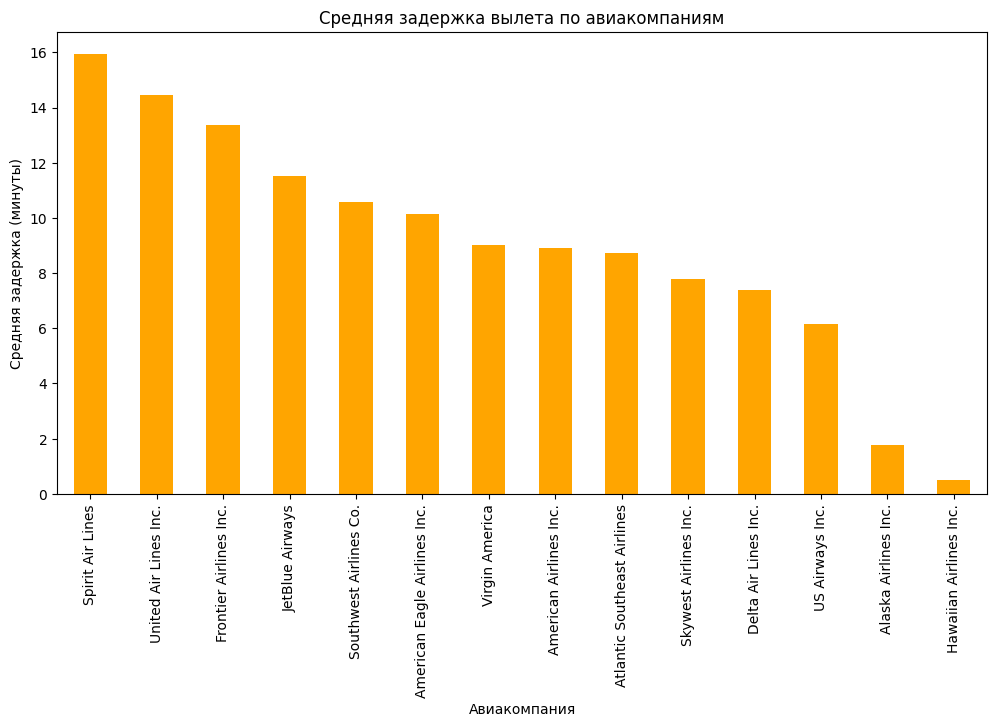

In [53]:
# Объединение данных о рейсах с данными об авиакомпаниях для получения названий
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE')

# Группировка по авиакомпаниям и расчет средней задержки
delay_by_airline = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
print(delay_by_airline)
# Построение графика
plt.figure(figsize=(12, 6))
delay_by_airline.plot(kind='bar', color='orange')
plt.title('Средняя задержка вылета по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка (минуты)')

plt.show()

Вывод графика:
Некоторые авиакомпании, такие как "Spirit Air Lines", "United Air Lines Inc." и "Frontier Airlines Inc.", имеют значительно более высокие средние задержки по сравнению с другими. Это может указывать на проблемы в управлении расписанием или технические трудности.



# 3)Задержки по аэропортам

AIRPORT
Wilmington Airport                                          29.391753
Martha's Vineyard Airport                                   25.907317
Barnstable Municipal Airport                                23.182927
St. Cloud Regional Airport                                  18.692308
Southwest Oregon Regional Airport (North Bend Municipal)    17.777358
Aspen-Pitkin County Airport                                 17.587538
Del Norte County Airport (Jack McNamara Field)              17.413793
Gustavus Airport                                            17.171053
Jack Brooks Regional Airport (Southeast Texas Regional)     17.020856
Guam International Airport                                  16.647590
Name: DEPARTURE_DELAY, dtype: float64


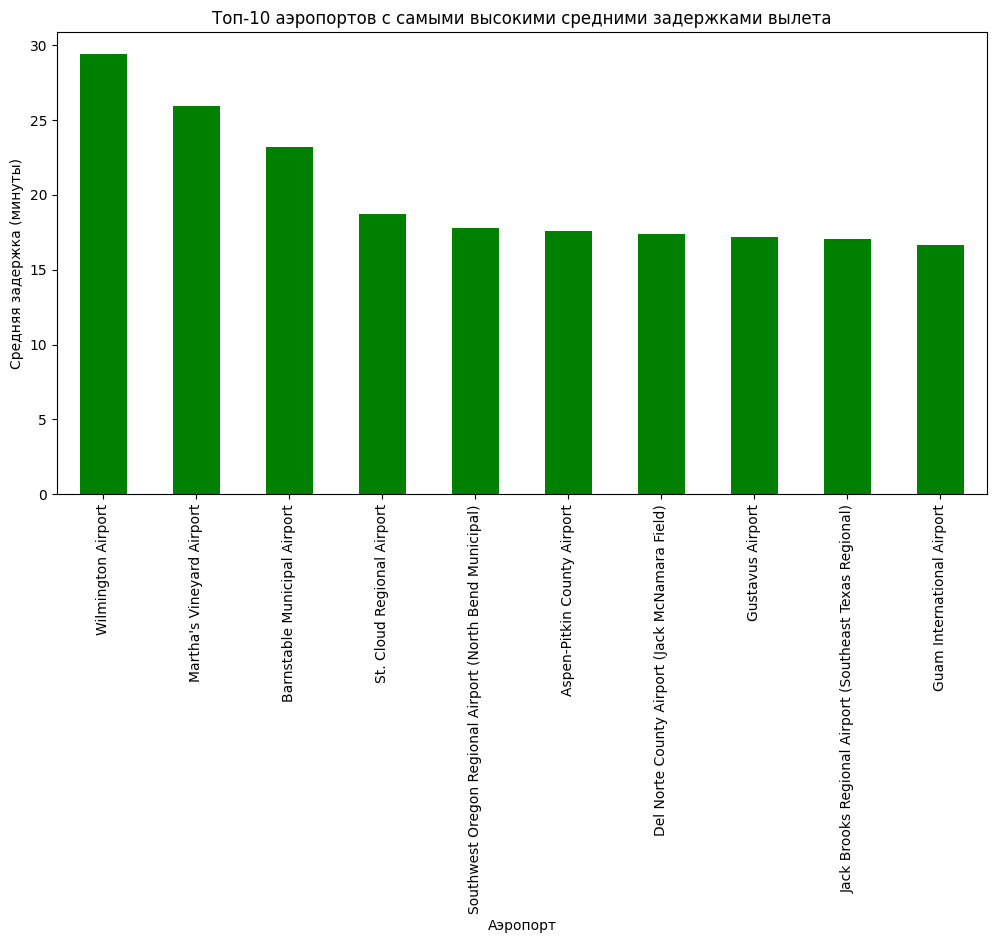

In [54]:
# Объединение данных о рейсах с данными об аэропортах для получения названий
flights_with_airports = pd.merge(flights, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Группировка по аэропортам отправления и расчет средней задержки
delay_by_airport = flights_with_airports.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)
print(delay_by_airport)

# Построение графика
plt.figure(figsize=(12, 6))
delay_by_airport.plot(kind='bar', color='green')
plt.title('Топ-10 аэропортов с самыми высокими средними задержками вылета')
plt.xlabel('Аэропорт')
plt.ylabel('Средняя задержка (минуты)')
plt.show()

Вывод графика:
Некоторые аэропорты, такие как "Wilmington Airport" и "Martha's Vineyard Airport", имеют значительно более высокие средние задержки. Это может быть связано с высокой загруженностью этих аэропортов.:

# 4)Пpичины задержек

Среднее время задержек по причинам (в минутах):
AIR_SYSTEM_DELAY       13.480568
SECURITY_DELAY          0.076154
AIRLINE_DELAY          18.969547
LATE_AIRCRAFT_DELAY    23.472838
WEATHER_DELAY           2.915290
dtype: float64


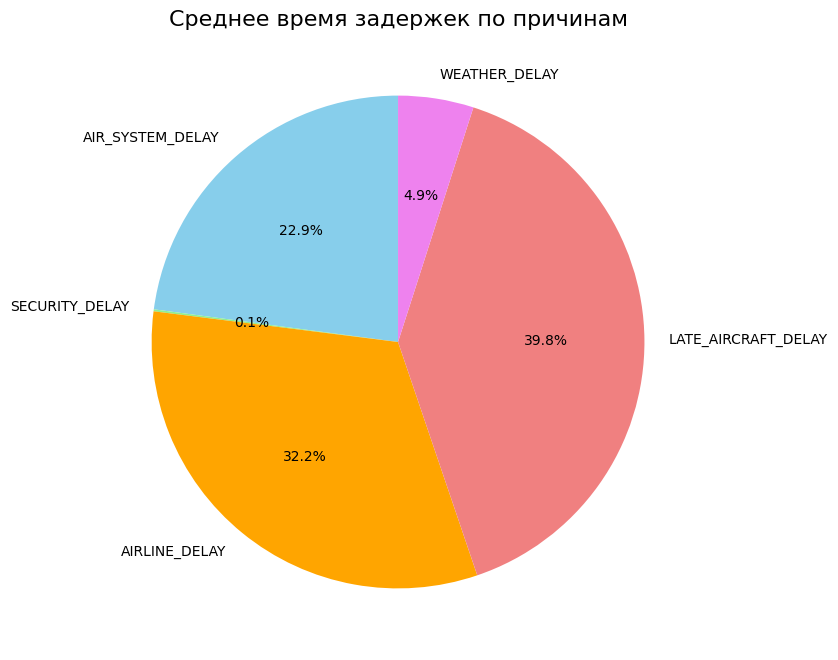

In [55]:
#Суммируем задержки по каждой причине
mean_delay_causes = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].mean()
print("Среднее время задержек по причинам (в минутах):")
print(mean_delay_causes)

# Названия причин задержек
causes_labels = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(mean_delay_causes, labels=causes_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'violet'])
plt.title('Среднее время задержек по причинам', fontsize=16)
plt.show()

Вывод графика: Основные причины задержек связаны с внутренними процессами авиакомпаний и опозданиями самолетов. Погодные условия и проблемы с безопасностью играют незначительную роль.

# 5) Влияние времени суток на задержки



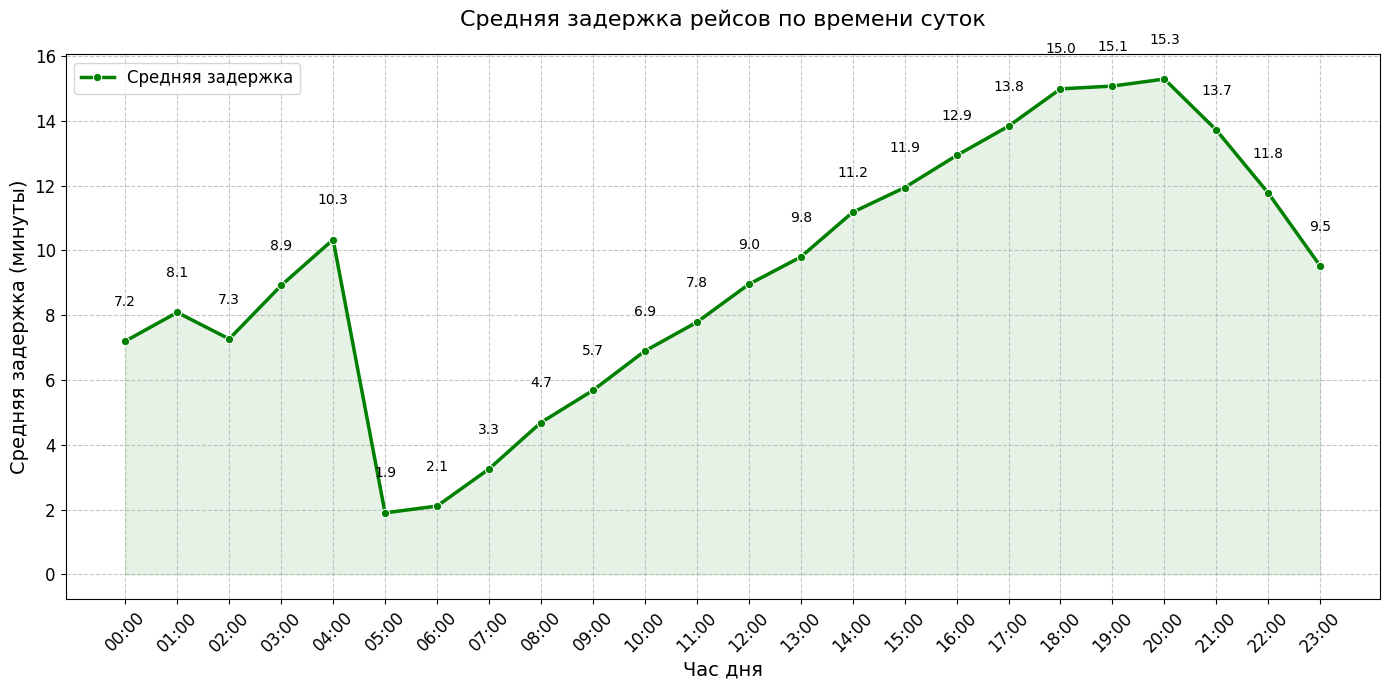

In [56]:
# Преобразование времени вылета в часы
flights['HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

# Группировка по часам и расчет среднего времени задержки
delay_by_hour = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()

# Визуализация
plt.figure(figsize=(14, 7))
sns.lineplot(x=delay_by_hour.index, y=delay_by_hour.values, marker='o', color='green', linewidth=2.5, label='Средняя задержка')
plt.fill_between(delay_by_hour.index, delay_by_hour.values, color='green', alpha=0.1)  # Заливка под линией

# Добавляем подписи к точкам
for hour, delay in zip(delay_by_hour.index, delay_by_hour.values):
    plt.text(hour, delay + 1, f'{delay:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Настройка графика
plt.title('Средняя задержка рейсов по времени суток', fontsize=16, pad=20)
plt.xlabel('Час дня', fontsize=14)
plt.ylabel('Средняя задержка (минуты)', fontsize=14)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45, fontsize=12)  # Подписи в формате "ЧЧ:00"
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Сетка с пунктирными линиями
plt.legend(fontsize=12)  # Легенда
plt.tight_layout()  # Улучшение компоновки
plt.show()

Вывод графика:
Задержки увеличиваются в утренние часы (5-6 утра) и вечером (20-00 часов). Это связано с пиковой нагрузкой на аэропорты в эти периоды.

Вывод: В ходе выполнения работы был проведен анализ данных о задержках рейсов с целью выявления ключевых проблемных областей и разработки рекомендаций для их устранения.Основные причины задержек включают опоздания самолетов, проблемы авиакомпаний и погодные условия. Для улучшения ситуации необходимо сосредоточиться на оптимизации расписания, улучшении технического обслуживания, модернизации инфраструктуры аэропортов и внедрении систем раннего предупреждения.